In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from terminal_optimization import hydrogen_objects
from terminal_optimization import hydrogen_defaults
from terminal_optimization import hydrogen_system

# 0. Prepare inputs

In [2]:
startyear = 2018
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2023:
        demand.append(1_000_000)
    else:
        demand.append(5_000_000)

scenario_data={'year': years, 'volume': demand}

# instantiate a commodity objects
lhydrogen = hydrogen_objects.Commodity(**hydrogen_defaults.lhydrogen_data)
lhydrogen.scenario_data = pd.DataFrame(data=scenario_data)

# Ammonia
hydrogen_defaults.ammonia_data['historic_data'] = []
hydrogen_defaults.ammonia_data['scenario_data'] = []
ammonia = hydrogen_objects.Commodity(**hydrogen_defaults.ammonia_data)

# MCH
hydrogen_defaults.MCH_data['historic_data'] = []
hydrogen_defaults.MCH_data['scenario_data'] = []
MCH = hydrogen_objects.Commodity(**hydrogen_defaults.MCH_data)

# combine
demand = [lhydrogen, ammonia, MCH]

# plot scenarios 
if False:
    lhydrogen.plot_demand()
    ammonia.plot_demand()
    MCH.plot_demand()

## 0.2 Generate vessels

In [4]:
# instantiate vessels
Smallhydrogen = hydrogen_objects.Vessel(**hydrogen_defaults.smallhydrogen_data)
Largehydrogen = hydrogen_objects.Vessel(**hydrogen_defaults.largehydrogen_data)
Smallammonia = hydrogen_objects.Vessel(**hydrogen_defaults.smallammonia_data)
Largeammonia = hydrogen_objects.Vessel(**hydrogen_defaults.largeammonia_data)
Handysize = hydrogen_objects.Vessel(**hydrogen_defaults.handysize_data)
Panamax = hydrogen_objects.Vessel(**hydrogen_defaults.panamax_data)
VLCC = hydrogen_objects.Vessel(**hydrogen_defaults.vlcc_data)


vessels = [Smallhydrogen, Largehydrogen, Smallammonia, Largeammonia, Handysize, Panamax, VLCC] 

# 1. Instatiate terminal system

In [15]:
Terminal = hydrogen_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 5840,   # example Wijnand
                         debug=False,
                         storage_type_defaults=hydrogen_defaults.storage_lh2_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [16]:
Terminal.simulate()

PV: [-1.05540000e+08 -3.59520062e+09 -1.82215719e+09 -9.59597313e+08
 -7.25474153e+08 -8.13425875e+09 -1.50938708e+09 -2.03407996e+09
 -1.19368229e+09 -4.53691240e+08]
NPV: -20533068597.35877


## Report all elements

In [17]:
if False: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

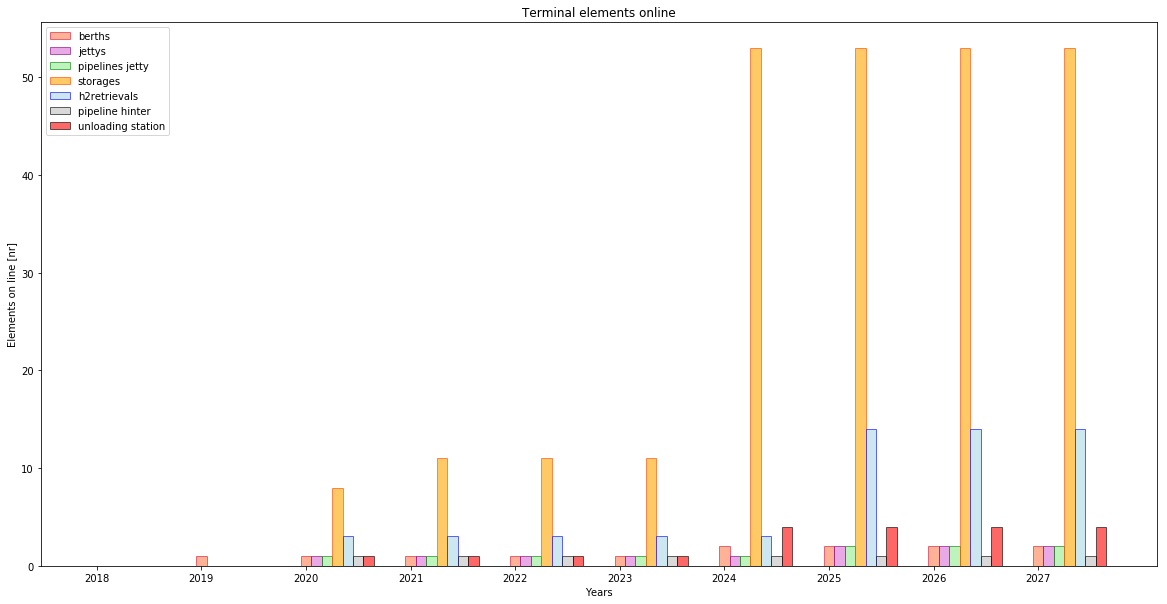

In [8]:
Terminal.terminal_elements_plot()

(   year         capex  maintenance    insurance        energy        labour  \
 0  2018  1.055400e+08          0.0          0.0  0.000000e+00  0.000000e+00   
 1  2019  4.083020e+09          0.0          0.0  0.000000e+00  0.000000e+00   
 2  2020  1.500600e+09   43284000.0   41836000.0  2.052514e+09  1.737192e+06   
 3  2021  0.000000e+00   58284000.0   56836000.0  2.753314e+09  1.962931e+06   
 4  2022  0.000000e+00   58284000.0   56836000.0  2.753314e+09  1.962931e+06   
 5  2023  2.122516e+10   58284000.0   56836000.0  3.471800e+09  1.962931e+06   
 6  2024  1.429340e+08  268332000.0  266860000.0  1.328289e+10  5.574746e+06   
 7  2025  0.000000e+00  273862000.0  270374000.0  1.658949e+10  6.477700e+06   
 8  2026  0.000000e+00  273862000.0  270374000.0  1.658949e+10  6.477700e+06   
 9  2027  0.000000e+00  273862000.0  270374000.0  1.658949e+10  6.477700e+06   
 
    demurrage    revenues  
 0          0           0  
 1          0           0  
 2          0  1000000000  
 3    

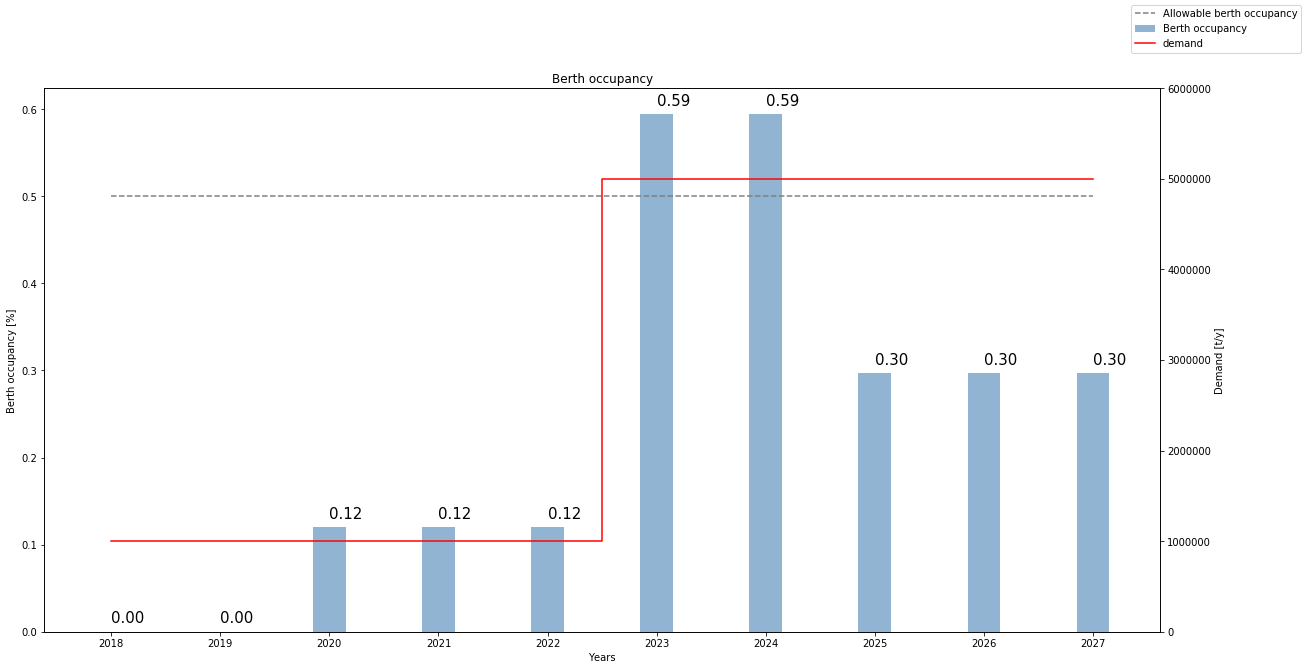

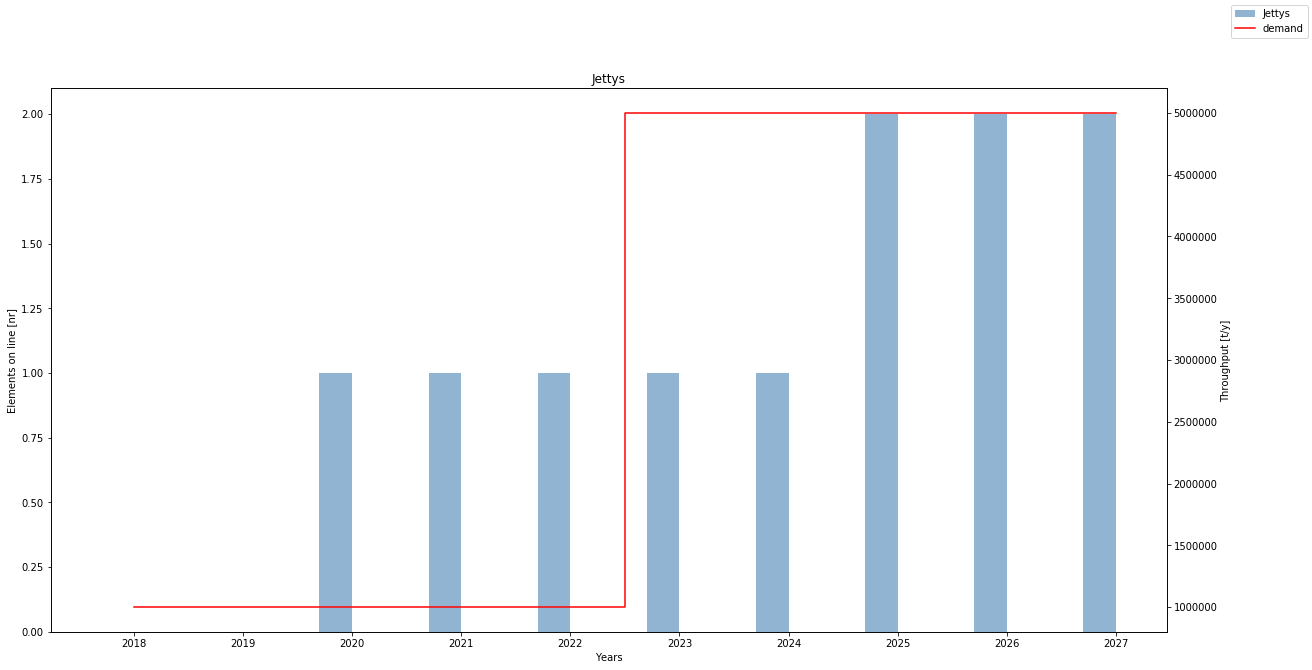

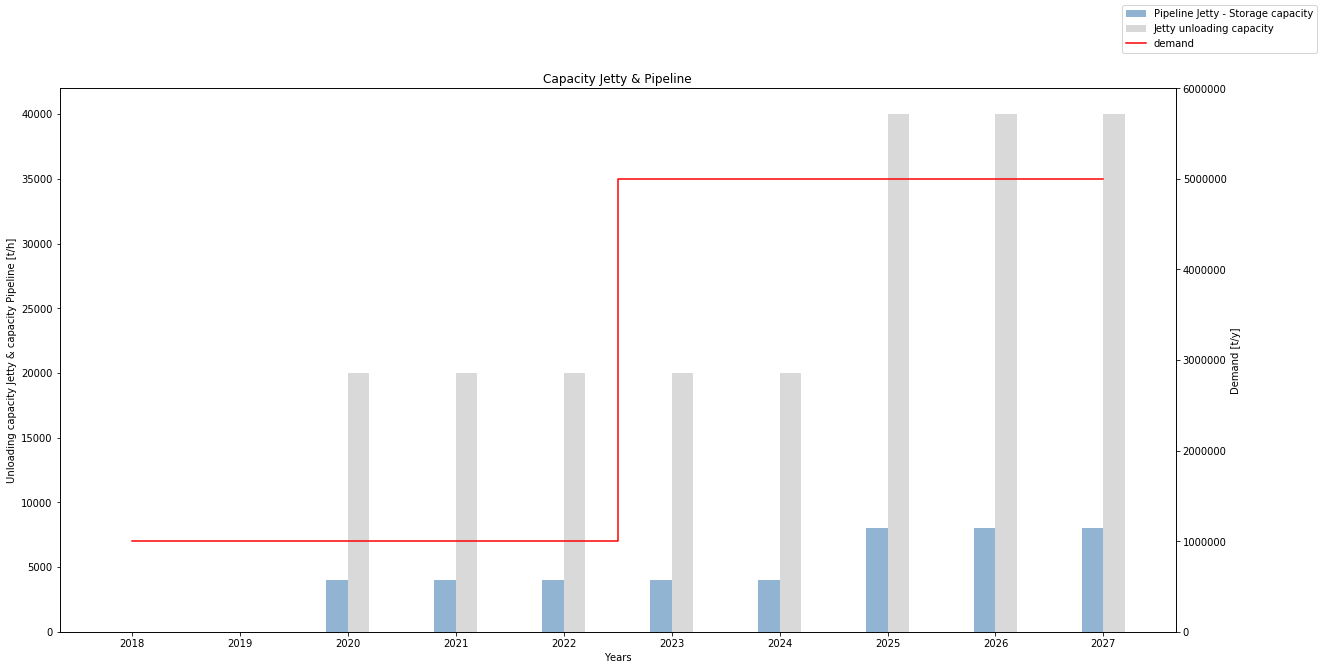

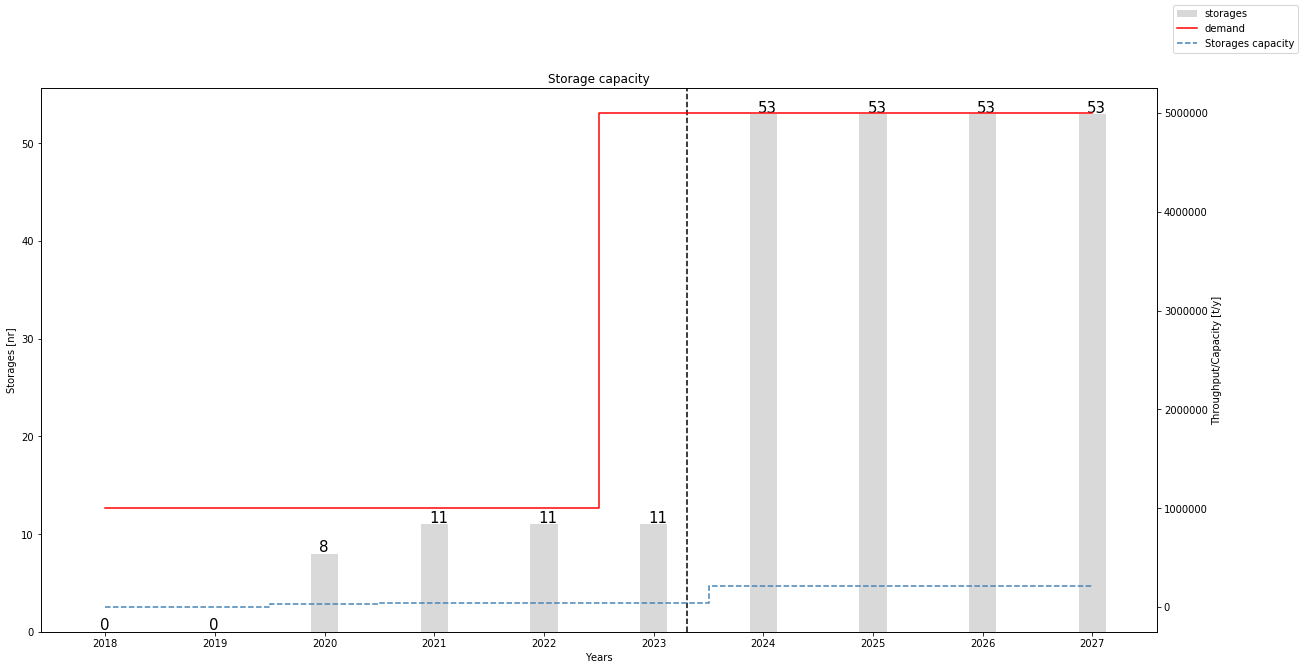

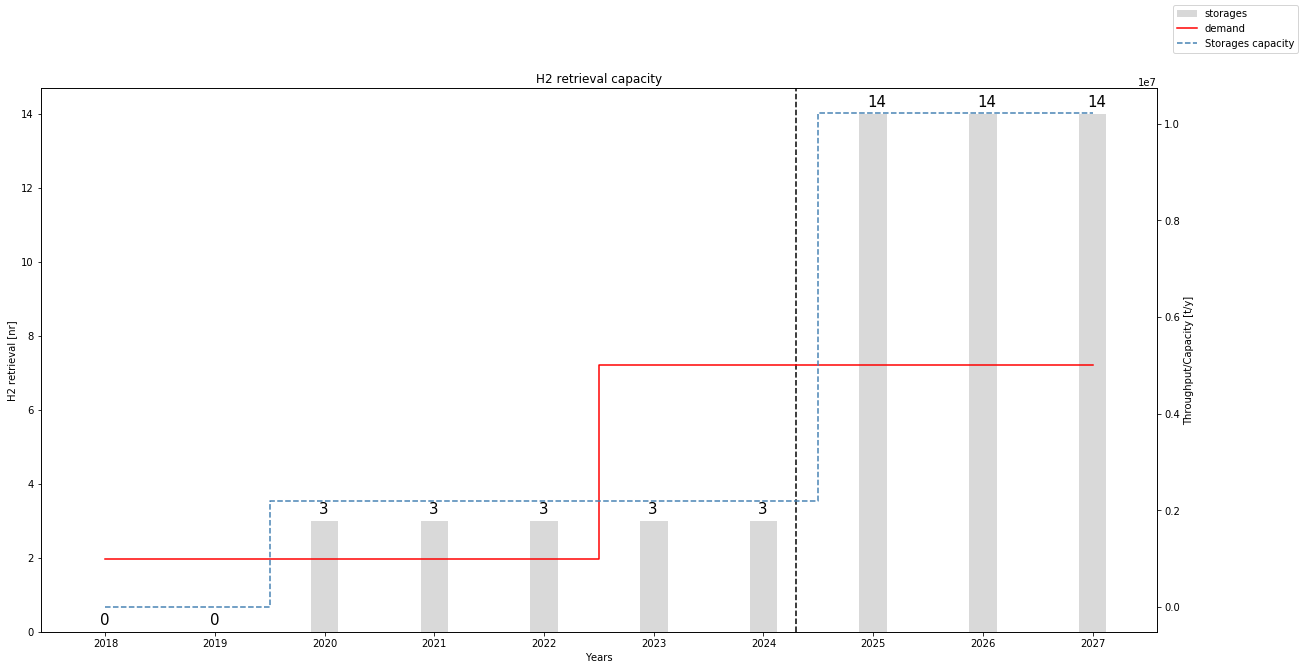

In [10]:
# to plot the terminal occupany 
Terminal.terminal_occupancy_example_plot()

# to plot the capacities of the different elements 
Terminal.terminal_elements_example_plot() #jetty
Terminal.terminal_pipeline_plot() #pipeline
Terminal.terminal_capacity_plot() #storage
Terminal.H2retrieval_capacity_plot() # H2 retrieval


In [11]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

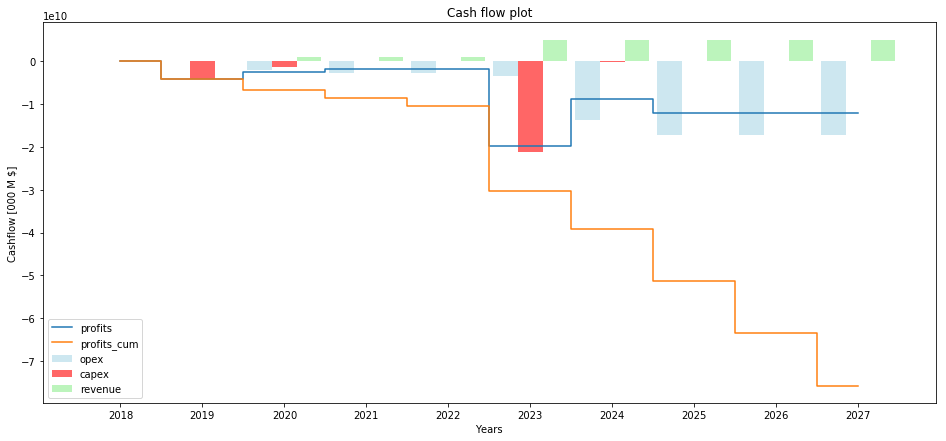

In [12]:
Terminal.cashflow_plot(cash_flows)

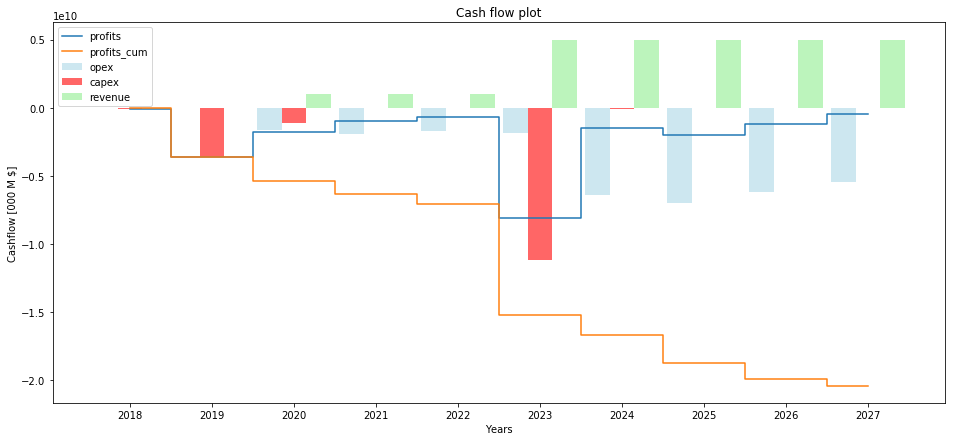

In [13]:
Terminal.cashflow_plot(cash_flows_WACC_real)

## SandBox

In [14]:
Terminal.NPV()

PV: [-1.05540000e+08 -3.59520062e+09 -1.82215719e+09 -9.59597313e+08
 -7.25474153e+08 -8.13425875e+09 -1.50938708e+09 -2.03407996e+09
 -1.19368229e+09 -4.53691240e+08]
NPV: -20533068597.35877
